# Primeros pasos con python y Jupyter Notebook

Como introducción a python y Jupyter, tomaremos ejemplos del libro "blueprints for Text Analysis using Python" que nos presentará en su inicio la base para el procesamiento de lenguaje natural, junto con las librerías y herramientas más elementales y una fácil comprensión de la información mostrando por pantalla distintas gráficas y tablas con la información deseada. 

Como primer paso, crearemos en el directorio en el que se encuentra nuestro notebook un archivo setup.py. Este archivo define e importa las librerías básicas que serán necesarias para el desarrollo del notebook, además de las rutas a directorios o archivos que vayamos a utilizar.

También cargaremos el archivo "settings.py" tomado directamente del repositorio proporcionado por los autores del libro. Este archivo proporciona características útiles para las herramientas que se van a utilizar. La ubicación de este archivo se encontrará en el directorio principal del proyecto, pues es común para todas las herramientas que se van a utilizar.

In [2]:
import sys, os

#Carga del archivo setup.py
%run -i setup.py

#Carga del archivo settings.py
%run "$BASE_DIR/settings.py"
%reload_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'png'

You are working on a local system.
Files will be searched relative to "..".


# Introducción a Pandas
Para el análisis de lenguaje natural, y siguiendo los pasos recomendados por el libro que se está utilizando como referencia para el desarrollo del proyecto, el primer paso que se deberá llevar a cabo será el de comprender el uso y funcionalidades de la librería "pandas" y como tratar con los datos de los que se dispone para obtener un mejor conocimiento sobre estos.

Comenzaremos por importar a nuestro programa la librería pandas para poder leer el dataset proporcionado por los autores del libro y a continuación se mostrará por pantalla información sobre los dataframes y un par de muestras (filas) del dataset.

In [3]:
import pandas as pd

# lee el dataset y lo asigna a la variable df
file = "un-general-debates-blueprint.csv"
df = pd.read_csv(file)

# Comandos de pandas para obtener info sobre los dataframes
df.columns
df.dtypes
df.info()
df.describe()

# imprime 2 muestras del dataset
df.sample(2, random_state=53)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7507 entries, 0 to 7506
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   session       7507 non-null   int64 
 1   year          7507 non-null   int64 
 2   country       7507 non-null   object
 3   country_name  7507 non-null   object
 4   speaker       7480 non-null   object
 5   position      4502 non-null   object
 6   text          7507 non-null   object
dtypes: int64(2), object(5)
memory usage: 410.7+ KB


,session,year,country,country_name,speaker,position,text
3871,51,1996,PER,Peru,Francisco Tudela Van Breughel Douglas,Minister for Foreign Affairs,"﻿At the outset, allow me,\nSir, to convey to you and to this Assembly the greetings\nand congratulations of the Peruvian people, as well as\ntheir best wishes and hopes for the future.\nPeru is a ..."
4697,56,2001,GBR,United Kingdom,Jack Straw,Minister for Foreign Affairs,"﻿Please allow me\nwarmly to congratulate you, Sir, on your assumption of\nthe presidency of the fifty-sixth session of the General\nAssembly.\nThis day, 11 November, is the anniversary of the\nArm..."


## Cálculos de estadísticas en columnas 
Se puede obtener información adicional del dataset utilizando la función "describe().T" de pandas, de forma que se nos mostrará un resumen con distintas características del mismo.

En este caso, se quiere obtener más información/una vista más global de la longitud del texto

In [4]:
df['length'] = df['text'].str.len()
df.describe().T

,count,mean,std,min,25%,50%,75%,max
session,7507.00,49.61,12.89,25.00,39.00,51.00,61.00,70.00
year,7507.00,1994.61,12.89,1970.00,1984.00,1996.00,2006.00,2015.00
length,7507.00,17967.28,7860.04,2362.00,12077.00,16424.00,22479.50,72041.00


También se puede utilizar esta función para obtener el número de valores únicos, como puede ser por ejemplo, el nombre y país de la persona que más discursos ha dado, según el dataset con el que contamos. Esto se consigue incluyendo el parámetro "include='0'" a las columnas que se desean destacar.

In [5]:
df[['country', 'speaker']].describe(include='O').T

,count,unique,top,freq
country,7507,199,ALB,46
speaker,7480,5428,Seyoum Mesfin,12


## Información perdida
En el código anterior se observa que hay una menor cantidad de "speakers" que de países, entonces se podría decir que hay información que no se ha tenido en cuenta o que se ha perdido.

Para comprobarlo, pandas ofrece una función que comprueba si alguna columna contiene valores nulos.

In [6]:
df.isna().sum()

session            0
year               0
country            0
country_name       0
speaker           27
position        3005
text               0
length             0
dtype: int64

Aquí se observa que hay 27 columnas "speaker" con valor "null". Para no llevar a confusiones a la hora de procesar los datos, es recomendable establecer un valor determinado a este tipo de campos.

In [7]:
df['speaker'].fillna('unknown', inplace=True)

También hay que tener en cuenta que distintos valores pueden pertenecer a un mismo elemento. De forma más sencilla, y tomando como ejemplo, el nombre de una misma persona puede escribirse de distintas formas como se demuestra a continuación.

In [8]:
df[df['speaker'].str.contains('Bush')]['speaker'].value_counts()

speaker
George W. Bush        4
Mr. George W. Bush    2
Bush                  1
George Bush           1
Mr. George W Bush     1
Name: count, dtype: int64

Estos casos anteriores se deben tener muy en cuenta para intentar obtener una información lo más exacta posible sobre la que trabajar más tarde.

## Comparando las distribuciones de valores entre categorías
Para una mejor comprensión de la distribución de valores podemos utilizar la herramienta "catplot" de la librería Seaborn, la cuál ofrece una variedad de gráficas, entre las que se incluye  la de cajas y la de violín, que ofrece una buena visión de lo que se quiere estudiar. 

<Figure size 800x200 with 0 Axes>

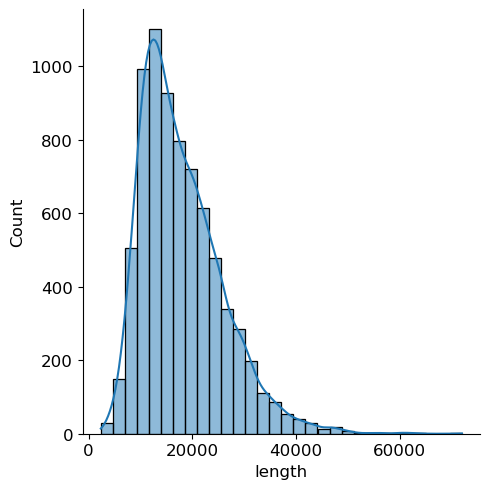

In [9]:
import seaborn as sns
#Definimos una gráfica simple para mostrar la longitud de los discursos
plt.figure(figsize=(8, 2))
sns.displot(df['length'], bins=30, kde=True);

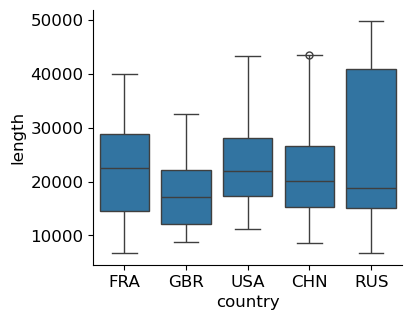

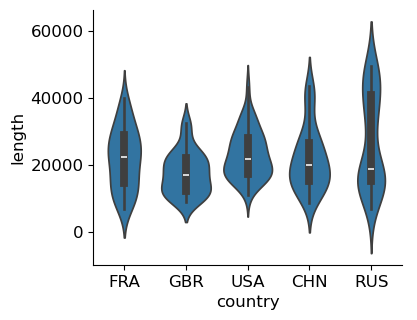

In [10]:
#Definimos que países del dataset queremos tener en cuenta para las gráficas
where = df['country'].isin(['USA', 'FRA', 'GBR', 'CHN', 'RUS'])

#Gráfica de caja
g = sns.catplot(data=df[where], x="country", y="length", kind='box')
g.fig.set_size_inches(4, 3)
g.fig.set_dpi(100) 

#Gráfica violín
g = sns.catplot(data=df[where], x="country", y="length", kind='violin')
g.fig.set_size_inches(4, 3)
g.fig.set_dpi(100) 

Se pueden usar una gran cantidad de gráficas disponibles a través de las diversas librerías, no me voy a detener a mostrar cada una de ellas, pues cuando sea realmente necesario se decidirá qué gráfica es la que mejor se adapta al resultado que se desea mostrar.

# Creación de un Pipeline de preprocesamiento de texto

## Tokenización con expresiones regulares
La tokenización es utilizada para extraer palabras de secuencias de caracteres de cualquier longitud. Para esto se hará uso de expresiones regulares.

En este ejemplo se utilizarán expresiones en formato POSIX para extraer expresiones que cuenten con al menos una letra, precedida o seguida de algún carácter alfanumérico.

In [11]:
import regex as re

def tokenize(text):
    #\p{L} -> al menos una letra
    #[\w-]* -> 0 o + caracteres alfanuméricos
    return re.findall(r'[\w-]*\p{L}[\w-]*', text)

#Ejemplo para comprobar funcionamiento
text = "La tokenización-extracción de palabras de un texto/frase funciona"
tokens = tokenize(text)
print("|".join(tokens))

La|tokenización-extracción|de|palabras|de|un|texto|frase|funciona


## Utilización de Stop Words
Las Stop Words son aquellas que tienen una frecuencia demasiado elevada en cualquier tipo de texto, por ejemplo, pronombres, adverbios, artículos, etc.

Este tipo de palabras se eliminan antes del análisis de datos pues no aportan ningún tipo de información relevante a la hora de la verdad.

Se utilizará la lista de stop words ofrecida por la librería NLTK en este ejemplo, pero hay muchas listas disponibles con una gran variedad de palabras. Además, es posible la edición de estas listas pudiendo añadir o eliminar palabras que el usuario considere necesarias, y si cuenta con el sufiente tiempo y ganas, se puede crear su propia lista uno mismo.

In [12]:
import nltk

#Descargamos la lista de stop words
nltk.download('stopwords')
#Establecemos el uso de stop words en inglés
stopwords = set(nltk.corpus.stopwords.words('english'))

#eliminamos las stop words de la lista de la frase tokenizada
def remove_stop(tokens):
    return [t for t in tokens if t.lower() not in stopwords]

#se pueden incluir/eliminar stop words adicionales no preestablecidos
include_stopwords = {'dear', 'regards', 'must', 'would', 'also'}
exclude_stopwords = {'against'}

stopwords |= include_stopwords
stopwords -= exclude_stopwords

print(stopwords)

{'shan', 'for', 'about', 'up', "needn't", 'between', "doesn't", 'than', 'will', 'an', 'o', "wasn't", 'while', "aren't", 't', 'by', 'hadn', 'needn', "it's", 'doesn', 'was', 'then', 'our', 'does', 'my', "mustn't", 'too', 'through', 'being', 'what', 'd', 'their', 'below', 'where', 'how', 'themselves', 'but', 'same', 'me', "you've", 'under', 'those', 'so', 'll', "didn't", 'did', 'again', 'ain', 'do', "hadn't", 'hasn', 'mightn', 'only', 'each', 'aren', 'and', 're', 've', 'very', 'having', 'because', 'himself', 'off', "won't", 'any', "you'll", "you'd", 'she', 'until', 'ours', 'once', 'am', 'her', 'yourself', "you're", 'more', 'the', 'nor', 'out', 'to', 'theirs', 'over', 'ourselves', 'few', 'which', 'there', 'you', 'is', 'here', 'wasn', 'ma', 'further', 'both', 'wouldn', 'in', 'such', "that'll", 'they', 'them', 'itself', 'should', 'regards', 'didn', 'isn', 'has', 'or', 'also', 'when', 'other', 'from', "hasn't", 'during', 'whom', 'with', 'can', 'were', 'down', 'no', 'don', "mightn't", 'haven',

[nltk_data] Downloading package stopwords to /home/diego/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Pipeline simple
Se creará una nueva columna en el dataset llamada "tokens" que contendrá el texto tokenizado, en minúsculas y sin stop words.

Un pipeline es utilizado para básicamente unir las funciones explicadas en los ejemplos anteriores y realizar todo el proceso en unas pocas líneas de código, y si se desea realizar más acciones sobre los datos, simplemente vale con extender el pipeline con más funcionalidades.

In [13]:
#Declaramos el pipeline
pipeline = [str.lower, tokenize, remove_stop]

def prepare(text, pipeline):
    tokens = text
    
    for transform in pipeline:
        tokens = transform(tokens)
    
    return tokens

In [14]:
#Ejecutamos el pipeline sobre los datos del archivo del principio
df['tokens'] = df['text'].progress_apply(prepare, pipeline=pipeline)

100%|██████████| 7507/7507 [00:25<00:00, 296.48it/s]


In [15]:
df['num_tokens'] = df['tokens'].progress_map(len)

100%|██████████| 7507/7507 [00:00<00:00, 594401.57it/s]



# Contando palabras
Podemos contar el número de veces que aparece una palabra/token a través de la clase Counter de python, mostrando como resultado la palabra como clave y la frecuencia de aparición como valores.

In [17]:
from collections import Counter

#Ejemplo de conteo de palabras con frase simple
tokens = tokenize("La ciberseguridad es importante, pero más importante que la ciberseguridad es la salud.")

counter = Counter(tokens)
print(counter)

Counter({'ciberseguridad': 2, 'es': 2, 'importante': 2, 'la': 2, 'La': 1, 'pero': 1, 'más': 1, 'que': 1, 'salud': 1})


Esta lista de contadores puede ser actualizada en cualquier momento con nuevas entradas de texto

In [18]:
more = tokenize("Manuel prefiere la ciberseguridad a la salud.")
counter.update(more)
print(counter)

Counter({'la': 4, 'ciberseguridad': 3, 'es': 2, 'importante': 2, 'salud': 2, 'La': 1, 'pero': 1, 'más': 1, 'que': 1, 'Manuel': 1, 'prefiere': 1, 'a': 1})


Se pueden también encontrar las palabras con más frecuencia de aparición en un corpus y mostrarlas por pantalla o trabajar con ellas.

In [21]:
counter = Counter()
mst_comm = df['tokens'].map(counter.update)

#se muestran las 5 palabras con frecuencia más alta del corpus
pp.pprint(counter.most_common(5))

[('nations', 124508),
 ('united', 120763),
 ('international', 117223),
 ('world', 89421),
 ('countries', 85734)]


Ahora, se verá como convertir el contador a un DataFrame de Pandas, que es un mejor formato para trabajar y estudiar los datos extraídos.

En este caso, los tokens conformarán el índice del DataFrame y la frecuencia de aparición de cada uno se almacenará en la columna "freq", la cuál se ordenará en orden de mayor frecuencia a menor.

In [22]:
def count_words(df, column='tokens', preprocess=None, min_freq=2):

    #procesa los tokens y actualiza el contador
    def update(doc):
        tokens = doc if preprocess is None else preprocess(doc)
        counter.update(tokens)

    #crea el contador y recorre todos los datos
    counter = Counter()
    df[column].progress_map(update)

    #transforma el contador a dataframe
    freq_df = pd.DataFrame.from_dict(counter, orient='index', columns=['freq'])
    freq_df = freq_df.query('freq >= @min_freq')
    freq_df.index.name = 'token'
    
    return freq_df.sort_values('freq', ascending=False)

#ejecución de la func. count_words y muestra por pantalla de las 5 primeras
freq_df = count_words(df)
freq_df.head(5)

100%|██████████| 7507/7507 [00:02<00:00, 3014.72it/s]


,freq
token,
nations,124508
united,120763
international,117223
world,89421
countries,85734


# Frecuencia Inversa del Documento
La frecuencia inversa del documento, IDF (siglas en inglés) es una forma de mostrar la inusualidad de algunos términos del corpus.

Esto es útil para el análisis de los datos pues se reduce la influencia de términos que aparecen con cierta frecuencia y se resaltan aquellas que pueden pasar más desapercibidas, pero que pueden tener un mayor peso en el contexto del estudio.

Este método es similar al conteo de palabras, pero en este caso cada token se tiene en cuenta una vez por documento para luego computar los valores IDF.

In [28]:
# ##No he conseguido instalar wordcloud en mi pc por problemas con el gestor
# #de paquetes yay que se usa en los sistemas basados en Arch Linux

# ##Por ahora, el código es prácticamente idéntico al ejemplificado en el libro
# #y en el momento que pueda reparar los problemas con el gestor trataré de ejecutarlo
# #y ver su funcionamiento correctamente
 
# from wordcloud import WordCloud

def compute_idf(df, column='tokens', preprocess=None, min_df=2):

    #conteo de tokens
    def update(doc):
        tokens = doc if preprocess is None else preprocess(doc)
        counter.update(set(tokens))

    counter = Counter()
    df[column].progress_map(update)

    #creación del data frame y cómputo IDF
    idf_df = pd.DataFrame.from_dict(counter, orient='index', columns=['df'])
    idf_df = idf_df.query('df >= @min_df')
    idf_df['idf'] = np.log(len(df)/idf_df['df'])+0.1
    idf_df.index.name = 'token'

    return idf_df

idf_df = compute_idf(df)

#Samples de valores IDF
#Alto IDF -> término interesante
idf_df.sample(5)

# #Mostrando los valores IDF a través de wordclouds tras añadir nuevas stopwords, 
# se pueden ver de manera más visible las palabras que se pueden tener en 
# mayor consideración a la hora del análisis
# freq_1970 = count_words(df[df['year'] == 1970])
# freq_2015 = count_words(df[df['year'] == 2015])

# freq_1970['tfidf'] = freq_1970['freq'] * idf_df['idf']
# freq_2015['tfidf'] = freq_2015['freq'] * idf_df['idf']

# plt.figure(figsize=(12,6))
# # #wordcloud(freq_df['freq'], title='All years', subplot=(1,3,1))
# plt.subplot(2,2,1)###
# wordcloud(freq_1970['freq'], title='1970 - TF', 
#           stopwords=['twenty-fifth', 'twenty-five'])
# plt.subplot(2,2,2)###
# wordcloud(freq_2015['freq'], title='2015 - TF', 
#           stopwords=['seventieth'])
# plt.subplot(2,2,3)###
# wordcloud(freq_1970['tfidf'], title='1970 - TF-IDF', 
#           stopwords=['twenty-fifth', 'twenty-five', 'twenty', 'fifth'])
# plt.subplot(2,2,4)###
# wordcloud(freq_2015['tfidf'], title='2015 - TF-IDF', 
#           stopwords=['seventieth'])

100%|██████████| 7507/7507 [00:01<00:00, 4876.60it/s]


,df,idf
token,,
account,2546,1.18
personified,10,6.72
technologies,579,2.66
divisionist,2,8.33
finnish,36,5.44


# Palabras clave según el contexto
En los nubes de palabras TF-IDF pueden aparecer términos cuyos significados no conocemos. Para evitar esto, se puede buscar el texto original en el que aparecen esos términos para observar el contexto de la frase y así tener una mejor noción del posible significado.

Para esto se hará uso de la función KWIC de la librería textacy por su rapidez gracias a que trabaja sobre texto no tokenizado.

Se utilizará una función similar a la siguiente para extender su uso para varios documentos pertenecientes a un mismo DataFrame.

In [33]:
import textacy

from textacy.text_utils import KWIC

def kwic(doc_series, keyword, window=35, print_samples=5):

    def add_kwic(text):
        kwic_list.extend(KWIC(text, keyword, ignore_case=True, 
                              window_width=window, print_only=False))

    kwic_list = []
    doc_series.progress_map(add_kwic)

    if print_samples is None or print_samples==0:
        return kwic_list
    else:
        k = min(print_samples, len(kwic_list))
        print(f"{k} random samples out of {len(kwic_list)} " + \
              f"contexts for '{keyword}':")
        for sample in random.sample(list(kwic_list), k):
            print(re.sub(r'[\n\t]', ' ', sample[0])+'  '+ \
                  sample[1]+'  '+\
                  re.sub(r'[\n\t]', ' ', sample[2]))
            

random.seed(22) ###
kwic(df[df['year'] == 2015]['text'], 'sdgs', print_samples=5)

ImportError: cannot import name 'ModelMetaclass' from 'pydantic.main' (/usr/lib/python3.12/site-packages/pydantic/main.py)